* **titanic** <br>
_Titanic gemisindeki yolcu verileri_
    * survived: Hayatta kalma durumu (0:hayır, 1: evet)
    * pclass: Üst sınıf yolcular (1, 2, 3, iyiden kötüye)
    * sex: Cinsiyet (Male, Female)
    * age: Yaş
    * sibsp: Yolcunun gemideki kardeş sayısı
    * parch: Yolcunun gemideki akraba sayısı
    * fare: Bilet için ödenen para
    * embarked: Yolcunun gemiye bindiği kapı
    * class: Yolcu sınıfı
    * who: Yolcunun dağılımı (Child, Man, Woman)
    * adult_male: Yolcunun erkek olup olmadığı (True, False)
    * deck: Yolcunun bulunduğu güverte
    * embark_town: Yolcunun gemiye bindiği iskelenin bulunduğu şehir
    * alive: Yolcunun hayatta kalıp kalmadığı (No, Yes)
    * alone: Yolcunun yalnız olup olmadığı (True, False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* Eksik değerler

In [4]:
df[df["deck"].isna()]["deck"].shape[0]

688

In [5]:
for item in df.columns:
    print(f"{item} -> {df[df[item].isna()][item].shape[0]}")

survived -> 0
pclass -> 0
sex -> 0
age -> 177
sibsp -> 0
parch -> 0
fare -> 0
embarked -> 2
class -> 0
who -> 0
adult_male -> 0
deck -> 688
embark_town -> 2
alive -> 0
alone -> 0


In [6]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [7]:
# filling null values as 'U' on deck columns
# df.deck.fillna('H') 
# df.head()  
#  Cannot setitem on a Categorical with a new category (H), set the categories first

In [8]:
df.deck = df.deck.astype('string')
df.deck.fillna('H', inplace=True)
df.deck = df.deck.astype('category')

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,H,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,H,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,H,Southampton,no,True


In [10]:
for item in df.columns:
    print(f"{item} -> {df[df[item].isna()][item].shape[0]}")

survived -> 0
pclass -> 0
sex -> 0
age -> 177
sibsp -> 0
parch -> 0
fare -> 0
embarked -> 2
class -> 0
who -> 0
adult_male -> 0
deck -> 0
embark_town -> 2
alive -> 0
alone -> 0


In [11]:
# We have 177 null columns on age column. I will assign mean of all age dataframe values
import math
mean_age = math.floor(df.age.mean())
mean_age

29

In [12]:
df[df.age.isna()].age

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age, Length: 177, dtype: float64

In [13]:
df.age.fillna(mean_age, inplace=True)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,H,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,H,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,H,Southampton,no,True
5,0,3,male,29.0,0,0,8.4583,Q,Third,man,True,H,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,H,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,H,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,H,Cherbourg,yes,False


In [14]:
for item in df.columns:
    print(f"{item} -> {df[df[item].isna()][item].shape[0]}")

survived -> 0
pclass -> 0
sex -> 0
age -> 0
sibsp -> 0
parch -> 0
fare -> 0
embarked -> 2
class -> 0
who -> 0
adult_male -> 0
deck -> 0
embark_town -> 2
alive -> 0
alone -> 0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
pd.DataFrame(df.embark_town.value_counts().sort_values(ascending = False))

,embark_town
Southampton,644
Cherbourg,168
Queenstown,77


In [17]:
pd.DataFrame(df.embark_town.value_counts().sort_values(ascending = False)).reset_index()["index"].loc[0]

'Southampton'

In [18]:
# en sık tekrar eden değeri boşluğa dolduracağız
df.embark_town.fillna(pd.DataFrame(df.embark_town.value_counts().sort_values(ascending = False)).reset_index()["index"].loc[0], inplace=True)
df[df.embark_town.isna()]
# we did it

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [19]:
pd.DataFrame(df.embark_town.value_counts().sort_values(ascending = False))

,embark_town
Southampton,646
Cherbourg,168
Queenstown,77


In [87]:
pd.DataFrame(df.embarked.value_counts().sort_values(ascending = False)).reset_index()["index"].loc[0]

'S'

In [20]:
df.embarked.fillna(pd.DataFrame(df.embarked.value_counts().sort_values(ascending = False)).reset_index()["index"].loc[0], inplace=True)
df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [21]:
pd.DataFrame(df.embarked.value_counts().sort_values(ascending = False))

,embarked
S,646
C,168
Q,77


# Pivot Table

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
for item in df.columns:
    print(f"{item} -> {df[item].unique().shape[0]}")

survived -> 2
pclass -> 3
sex -> 2
age -> 88
sibsp -> 7
parch -> 7
fare -> 248
embarked -> 3
class -> 3
who -> 3
adult_male -> 2
deck -> 8
embark_town -> 3
alive -> 2
alone -> 2


In [24]:
table = pd.pivot_table(data = df, index = ["sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"])
table

age  \
sex    embarked class who   adult_male deck embark_town alive alone              
female C        First woman False      A    Cherbourg   yes   False  48.000000   
                                       B    Cherbourg   yes   False  27.375000   
                                                              True   37.500000   
                                       C    Cherbourg   no    True   50.000000   
                                                        yes   False  32.833333   
...                                                                        ...   
male   S        Third man   True       F    Southampton no    True   28.666667   
                                       H    Southampton no    False  28.378049   
                                                              True   28.876437   
                                                        yes   False  22.500000   
                                                              True   28.833333   

                                                                           fare  \
sex    embarked class who   adult_male deck embark_town alive alone               
female C        First woman False      A    Cherbourg   yes   False   39.600000   
                                       B    Cherbourg   yes   False  146.916150   
                                                              True    78.210400   
                                       C    Cherbourg   no    True    28.712500   
                                                        yes   False  115.142350   
...                                                                         ...   
male   S        Third man   True       F    Southampton no    True     7.650000   
                                       H    Southampton no    False   22.069617   
                                                              True     8.813594   
                                                        yes   False    7.850000   
                                                              True    17.812146   

                                                                        parch  \
sex    embarked class who   adult_male deck embark_town alive alone             
female C        First woman False      A    Cherbourg   yes   False  0.000000   
                                       B    Cherbourg   yes   False  1.125000   
                                                              True   0.000000   
                                       C    Cherbourg   no    True   0.000000   
                                                        yes   False  0.333333   
...                                                                       ...   
male   S        Third man   True       F    Southampton no    True   0.000000   
                                       H    Southampton no    False  0.878049   
                                                              True   0.000000   
                                                        yes   False  0.000000   
                                                              True   0.000000   

                                                                     pclass  \
sex    embarked class who   adult_male deck embark_town alive alone           
female C        First woman False      A    Cherbourg   yes   False       1   
                                       B    Cherbourg   yes   False       1   
                                                              True        1   
                                       C    Cherbourg   no    True        1   
                                                        yes   False       1   
...                                                                     ...   
male   S        Third man   True       F    Southampton no    True        3   
                                       H    Southampton no    False       3   
                                                              True        3   
     

In [26]:
table = pd.pivot_table(data = df, index = ["sex", "embarked", "class"])
table

adult_male        age     alone        fare     parch  \
sex    embarked class                                                           
female C        First     0.000000  35.232558  0.418605  115.640309  0.302326   
                Second    0.000000  19.142857  0.285714   25.268457  0.571429   
                Third     0.000000  18.608696  0.217391   14.694926  0.826087   
       Q        First     0.000000  33.000000  0.000000   90.000000  0.000000   
                Second    0.000000  29.500000  1.000000   12.350000  0.000000   
                Third     0.000000  27.136364  0.757576   10.307833  0.242424   
       S        First     0.000000  33.100000  0.320000   98.265834  0.600000   
                Second    0.000000  29.708955  0.417910   21.912687  0.626866   
                Third     0.000000  24.011364  0.340909   18.670077  1.000000   
male   C        First     1.000000  38.523810  0.547619   93.536707  0.333333   
                Second    0.900000  26.550000  0.400000   25.421250  0.500000   
                Third     0.906977  26.684186  0.767442    9.352237  0.139535   
       Q        First     1.000000  44.000000  0.000000   90.000000  0.000000   
                Second    1.000000  57.000000  1.000000   12.350000  0.000000   
                Third     0.897436  28.692308  0.743590   11.924251  0.128205   
       S        First     0.962025  39.448354  0.658228   52.949947  0.253165   
                Second    0.917526  30.740515  0.690722   19.232474  0.195876   
                Third     0.924528  27.041509  0.762264   13.307149  0.252830   

                        pclass     sibsp  survived  
sex    embarked class                               
female C        First        1  0.511628  0.976744  
                Second       2  0.714286  1.000000  
                Third        3  0.565217  0.652174  
       Q        First        1  1.000000  1.000000  
                Second       2  0.000000  1.000000  
                Third        3  0.212121  0.727273  
       S        First        1  0.580000  0.960000  
                Second       2  0.477612  0.910448  
                Third        3  1.238636  0.375000  
male   C        First        1  0.238095  0.404762  
                Second       2  0.500000  0.200000  
                Third        3  0.232558  0.232558  
       Q        First        1  2.000000  0.000000  
                Second       2  0.000000  0.000000  
                Third        3  0.589744  0.076923  
       S        First        1  0.329114  0.354430  
                Second       2  0.329897  0.154639  
                Third        3  0.528302  0.128302

In [27]:
table = pd.pivot_table(data = df, index = ["sex", "embarked", "class"], aggfunc=[np.mean, np.sum])
table

mean                                             \
                       adult_male        age     alone        fare     parch   
sex    embarked class                                                          
female C        First    0.000000  35.232558  0.418605  115.640309  0.302326   
                Second   0.000000  19.142857  0.285714   25.268457  0.571429   
                Third    0.000000  18.608696  0.217391   14.694926  0.826087   
       Q        First    0.000000  33.000000  0.000000   90.000000  0.000000   
                Second   0.000000  29.500000  1.000000   12.350000  0.000000   
                Third    0.000000  27.136364  0.757576   10.307833  0.242424   
       S        First    0.000000  33.100000  0.320000   98.265834  0.600000   
                Second   0.000000  29.708955  0.417910   21.912687  0.626866   
                Third    0.000000  24.011364  0.340909   18.670077  1.000000   
male   C        First    1.000000  38.523810  0.547619   93.536707  0.333333   
                Second   0.900000  26.550000  0.400000   25.421250  0.500000   
                Third    0.906977  26.684186  0.767442    9.352237  0.139535   
       Q        First    1.000000  44.000000  0.000000   90.000000  0.000000   
                Second   1.000000  57.000000  1.000000   12.350000  0.000000   
                Third    0.897436  28.692308  0.743590   11.924251  0.128205   
       S        First    0.962025  39.448354  0.658228   52.949947  0.253165   
                Second   0.917526  30.740515  0.690722   19.232474  0.195876   
                Third    0.924528  27.041509  0.762264   13.307149  0.252830   

                                                         sum                 \
                       pclass     sibsp  survived adult_male      age alone   
sex    embarked class                                                         
female C        First       1  0.511628  0.976744          0  1515.00    18   
                Second      2  0.714286  1.000000          0   134.00     2   
                Third       3  0.565217  0.652174          0   428.00     5   
       Q        First       1  1.000000  1.000000          0    33.00     0   
                Second      2  0.000000  1.000000          0    59.00     2   
                Third       3  0.212121  0.727273          0   895.50    25   
       S        First       1  0.580000  0.960000          0  1655.00    16   
                Second      2  0.477612  0.910448          0  1990.50    28   
                Third       3  1.238636  0.375000          0  2113.00    30   
male   C        First       1  0.238095  0.404762         42  1618.00    23   
                Second      2  0.500000  0.200000          9   265.50     4   
                Third       3  0.232558  0.232558         39  1147.42    33   
       Q        First       1  2.000000  0.000000          1    44.00     0   
                Second      2  0.000000  0.000000          1    57.00     1   
                Third       3  0.589744  0.076923         35  1119.00    29   
       S        First       1  0.329114  0.354430         76  3116.42    52   
                Second      2  0.329897  0.154639         89  2981.83    67   
                Third       3  0.528302  0.128302        245  7166.00   202   

                                                               
                             fare parch pclass sibsp survived  
sex    embarked class                                          
female C        First   4972.5333    13     43    22       42  
                Second   176.8792     4     14     5        7  
                Third    337.9833    19     69    13       15  
       Q        First     90.0000     0      1     1        1  
                Second    24.7000     0      4     0        2  
                Third    340.1585     8     99     7       24  
       S        First   4913.2917    30     50    29       48  
                Second  1468.1500    42    134  

In [34]:
table = pd.pivot_table(data = df, index = ["class", "embark_town", "alive", "alone"], columns = ["sex"], aggfunc=np.mean)
table

adult_male                  age             \
sex                                female      male     female       male   
class  embark_town alive alone                                              
First  Cherbourg   no    False        NaN  1.000000        NaN  40.700000   
                         True         0.0  1.000000  50.000000  39.933333   
                   yes   False        0.0  1.000000  35.800000  36.888889   
                         True         0.0  1.000000  33.529412  35.000000   
       Queenstown  no    False        NaN  1.000000        NaN  44.000000   
                   yes   False        0.0       NaN  33.000000        NaN   
       Southampton no    False        0.0  1.000000  13.500000  40.812500   
                         True         NaN  1.000000        NaN  42.300000   
                   yes   False        0.0  0.727273  33.500000  29.538182   
                         True         0.0  1.000000  34.750000  38.705882   
Second Cherbourg   no    False        NaN  1.000000        NaN  29.500000   
                         True         NaN  1.000000        NaN  29.333333   
                   yes   False        0.0  0.000000  18.800000   1.000000   
                         True         0.0  1.000000  20.000000  29.000000   
       Queenstown  no    True         NaN  1.000000        NaN  57.000000   
                   yes   True         0.0       NaN  29.500000        NaN   
       Southampton no    False        0.0  1.000000  32.333333  33.690476   
                         True         0.0  1.000000  39.666667  32.885246   
                   yes   False        0.0  0.111111  25.916667   5.703333   
                         True         0.0  1.000000  33.660000  36.166667   
Third  Cherbourg   no    False        0.0  0.800000  24.785714  22.800000   
                         True         0.0  0.964286  17.000000  29.178571   
                   yes   False        0.0  0.600000  13.772727  18.084000   
                         True         0.0  1.000000  21.500000  25.200000   
       Queenstown  no    False        0.0  0.555556  33.333333  19.666667   
                         True         0.0  1.000000  26.083333  31.666667   
                   yes   False        0.0  1.000000  29.000000  29.000000   
                         True         0.0  1.000000  26.000000  29.000000   
       Southampton no    False        0.0  0.759259  23.846154  23.175926   
                         True         0.0  1.000000  26.625000  28.872881   
                   yes   False        0.0  0.222222  21.210526   8.888889   
                         True         0.0  1.000000  25.285714  28.960000   

                                      fare                 parch            \
sex                                 female        male    female      male   
class  embark_town alive alone                                               
First  Cherbourg   no    False         NaN  113.373330       NaN  0.900000   
                         True    28.712500   59.163047  0.000000  0.000000   
                   yes   False  112.003000  126.117144  0.520000  0.555556   
                         True   126.102694   96.538550  0.000000  0.000000   
       Queenstown  no    False         NaN   90.000000       NaN  0.000000   
                   yes   False   90.000000         NaN  0.000000       NaN   
       Southampton no    False  151.550000   96.305469  2.000000  0.687500   
                         True          NaN   34.024046       NaN  0.000000   
                   yes   False   99.374741   87.660609  0.812500  0.818182   
                         True    89.387500   28.650000  0.000000  0.000000   
Second Cherbourg   no    False         NaN   32.075000       NaN  0.600000   
                         True          NaN   14.323600       NaN  0.000000   
                   yes   False   30.217500   37.004200  0.800000  2.000000   
                         True    12.895850   13.862500  0.000000  0.000000   
       Qu

<Figure size 1200x800 with 0 Axes>

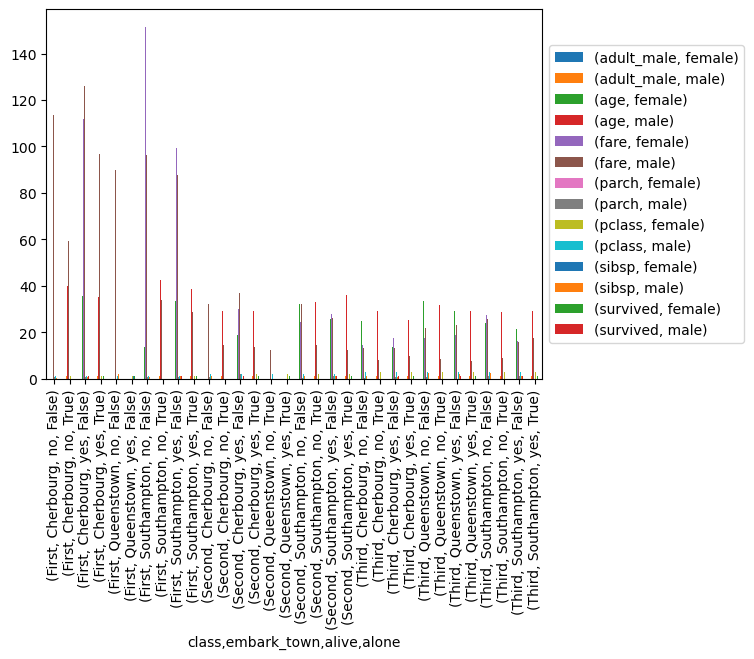

In [39]:
plt.figure(figsize = (12,8))
table.plot(kind = "bar")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Kategorik Değişken

In [40]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [41]:
for item in df.select_dtypes(include = ["category", "object"]).columns:
    print(f"{item} -> {df[item].unique().shape[0]}")

sex -> 2
embarked -> 3
class -> 3
who -> 3
deck -> 8
embark_town -> 3
alive -> 2


AxesSubplot(0.125,0.11;0.775x0.77)


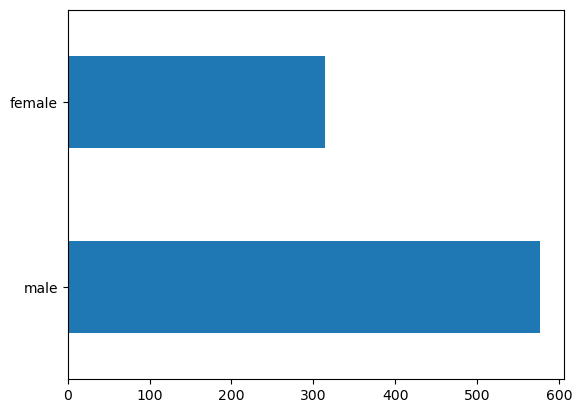

AxesSubplot(0.125,0.11;0.775x0.77)


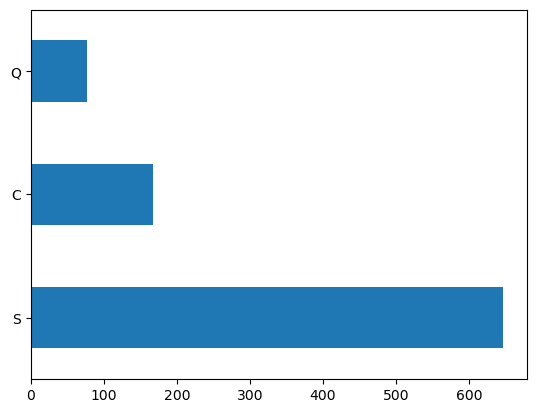

AxesSubplot(0.125,0.11;0.775x0.77)


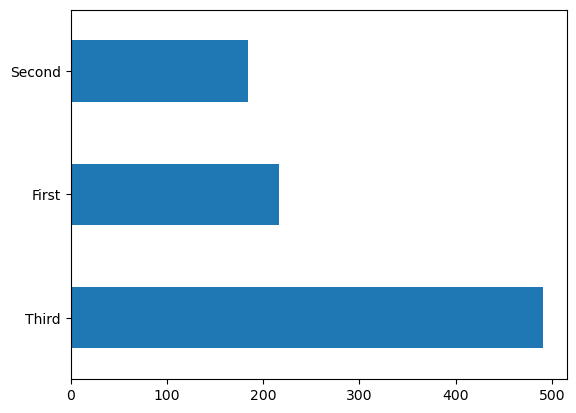

AxesSubplot(0.125,0.11;0.775x0.77)


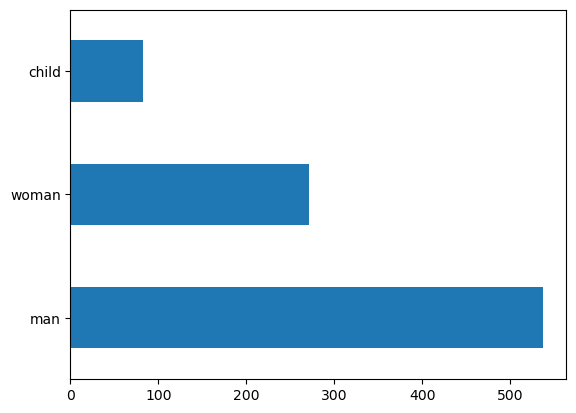

AxesSubplot(0.125,0.11;0.775x0.77)


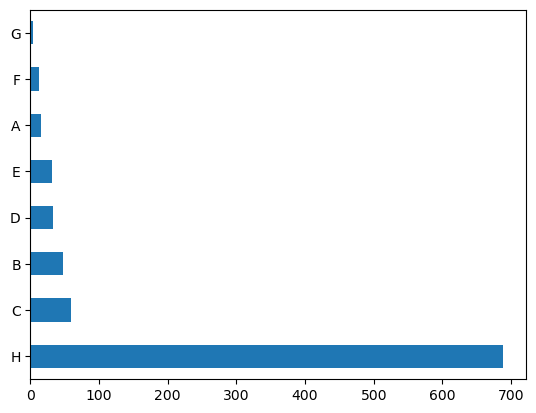

AxesSubplot(0.125,0.11;0.775x0.77)


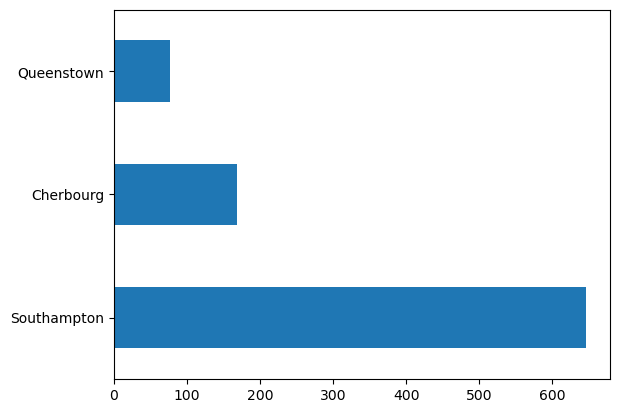

AxesSubplot(0.125,0.11;0.775x0.77)


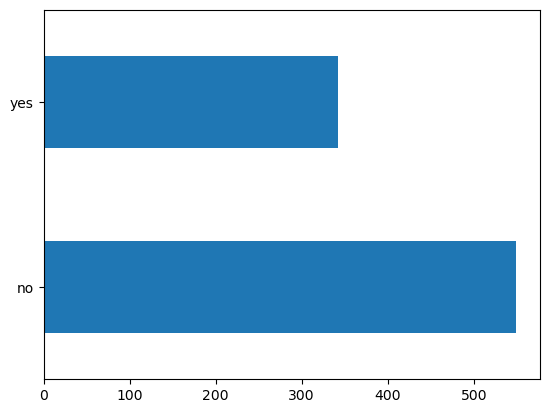

In [51]:
#sayac = 1
#plt.subplot(len(df.select_dtypes(include = ["category", "object"]).columns), 1, sayac)
for item in df.select_dtypes(include = ["category", "object"]):
    # plt.subplot(len(df.select_dtypes(include = ["category", "object"]).columns), 1, sayac)
    # plt.figure(figsize = (8, 6))
    print(df[item].value_counts().plot.barh())
    plt.show()
    #sayac = sayac+1

# Barplot

In [50]:
num_list =  list(df.select_dtypes(include = ["float64", "int64"]).columns)
cat_list = list(df.select_dtypes(include = ["category", "object"]).columns)

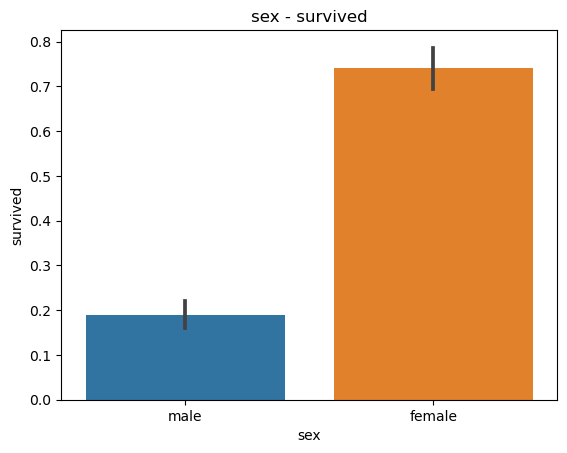

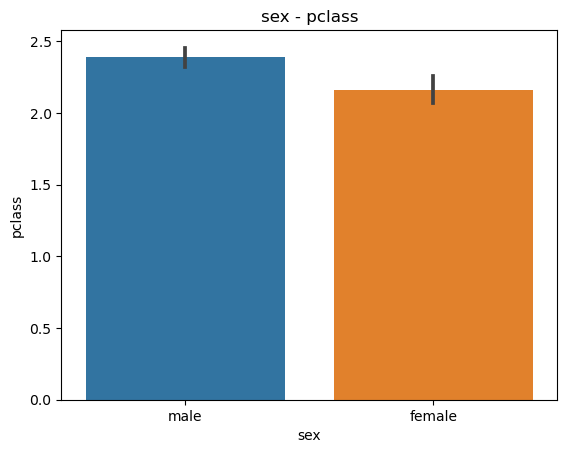

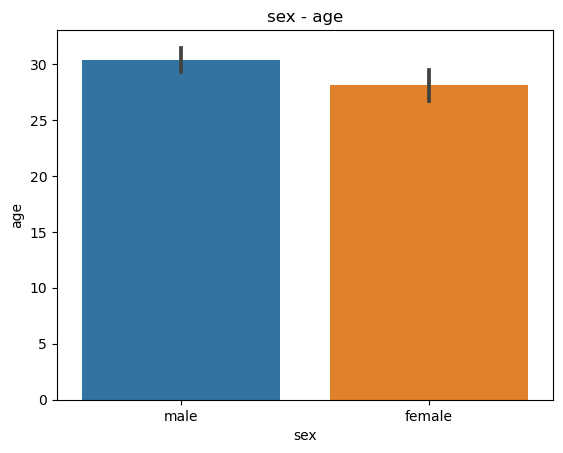

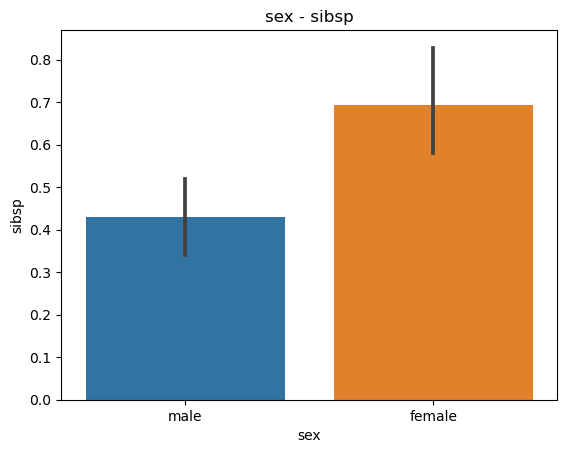

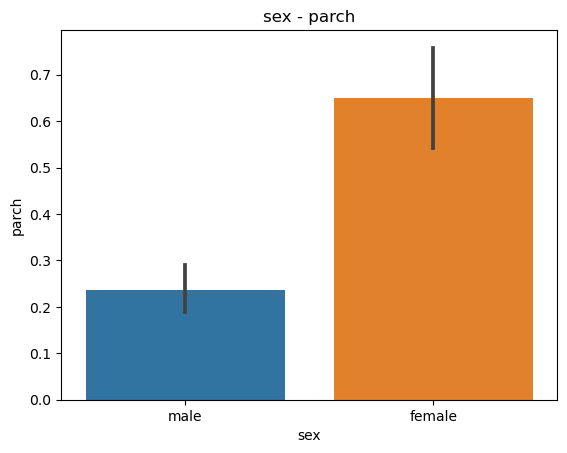

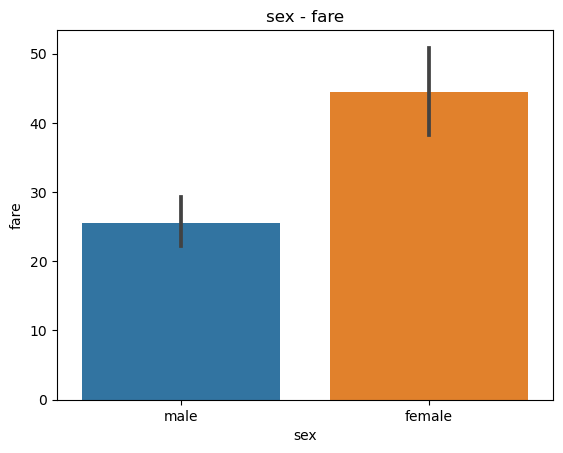

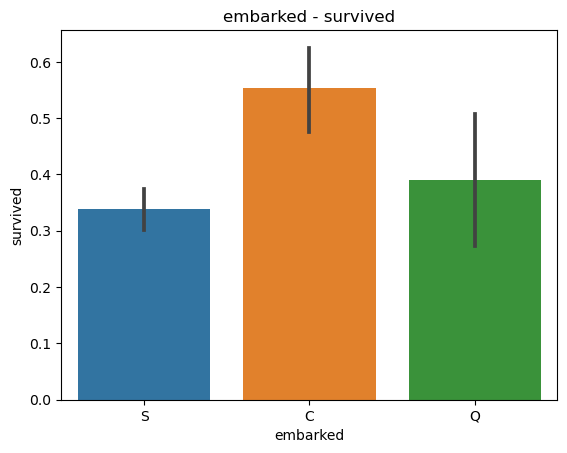

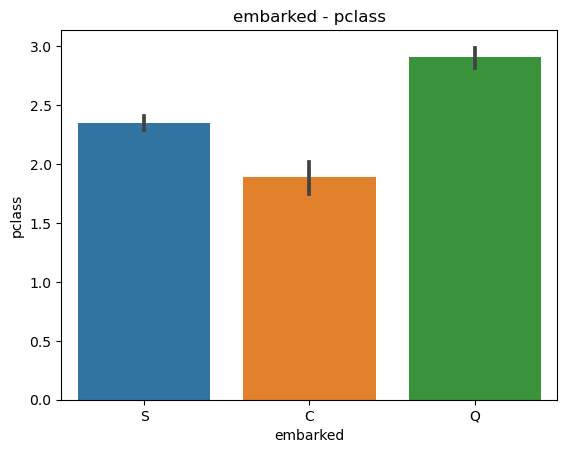

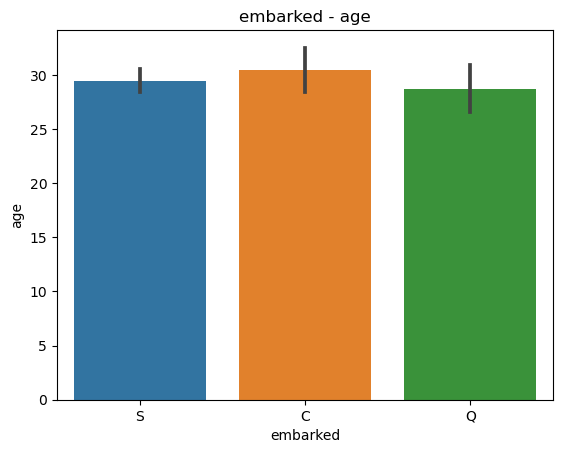

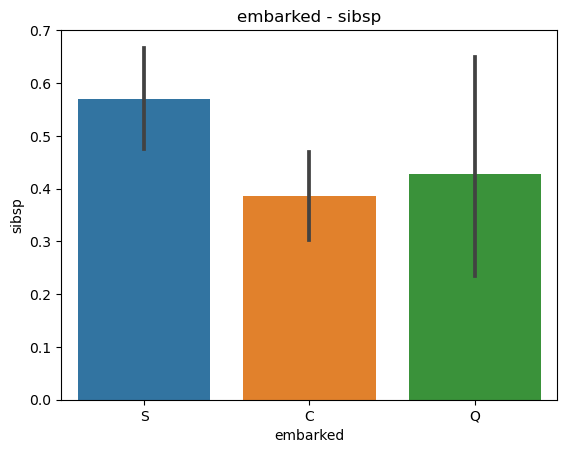

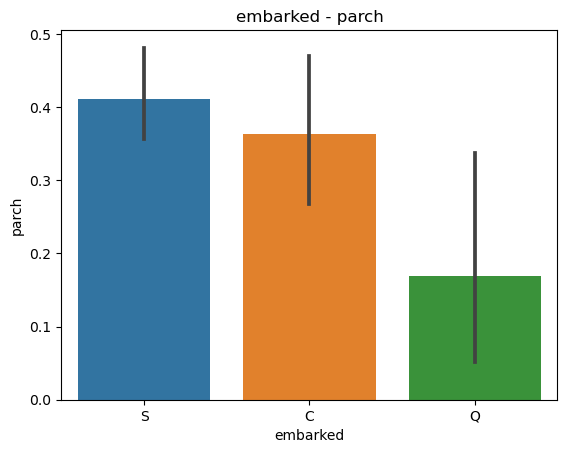

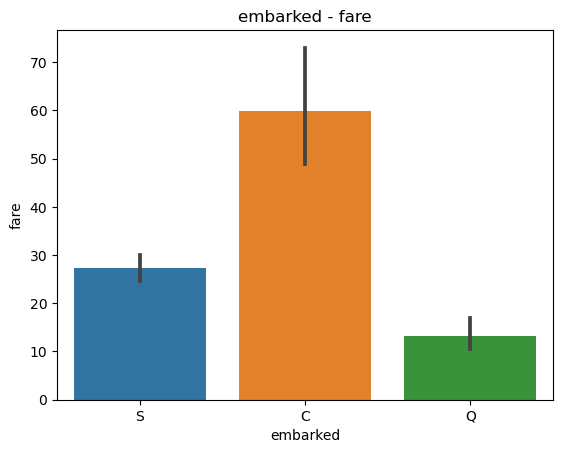

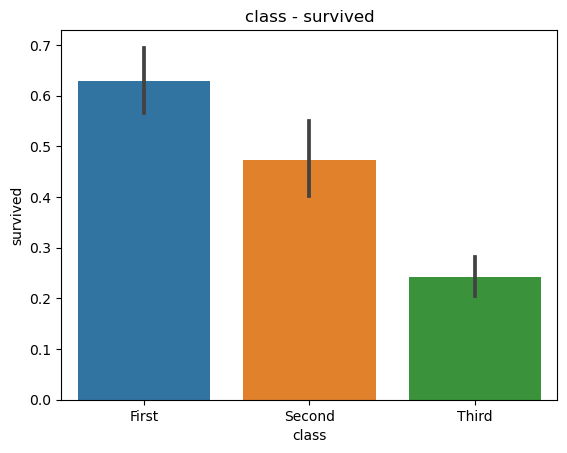

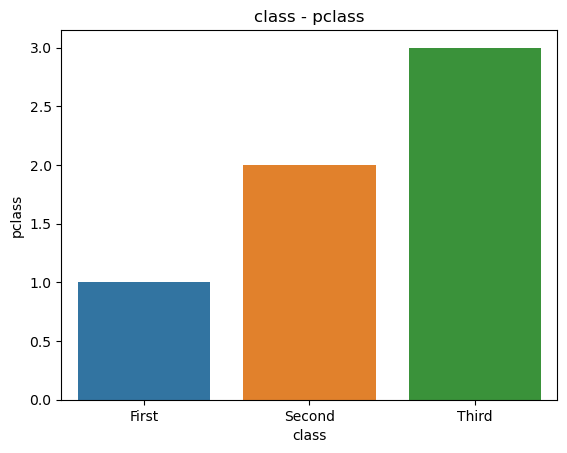

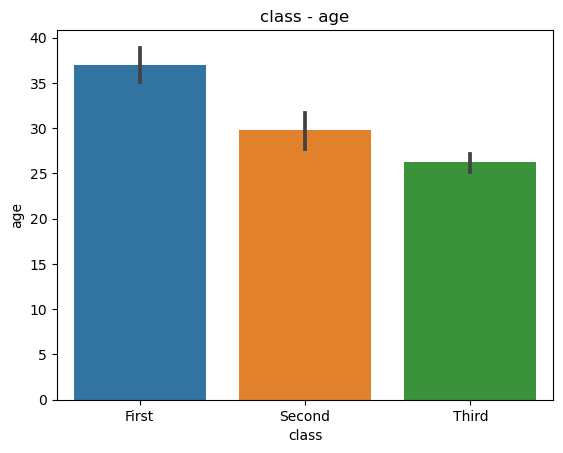

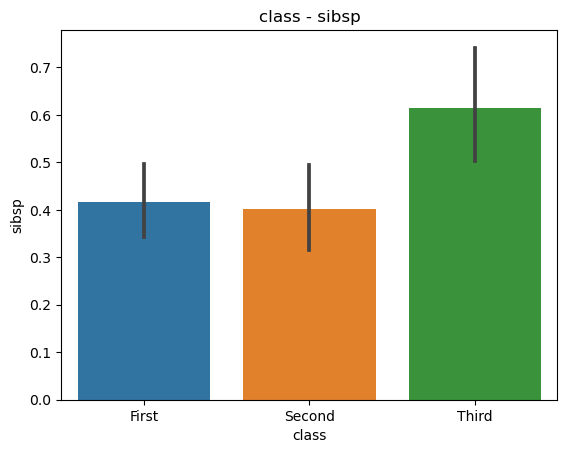

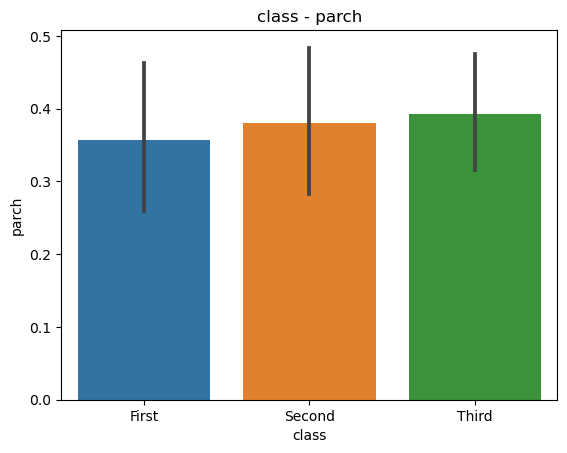

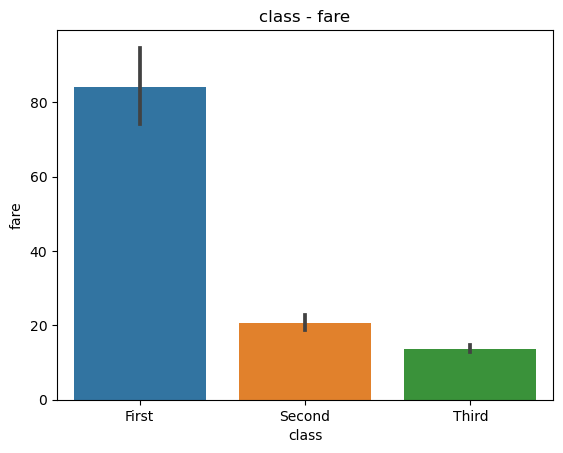

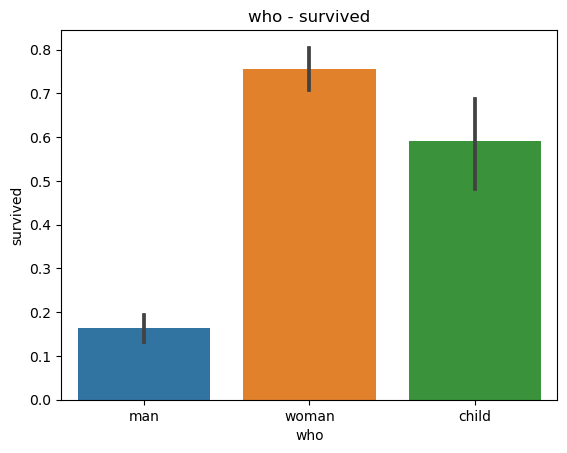

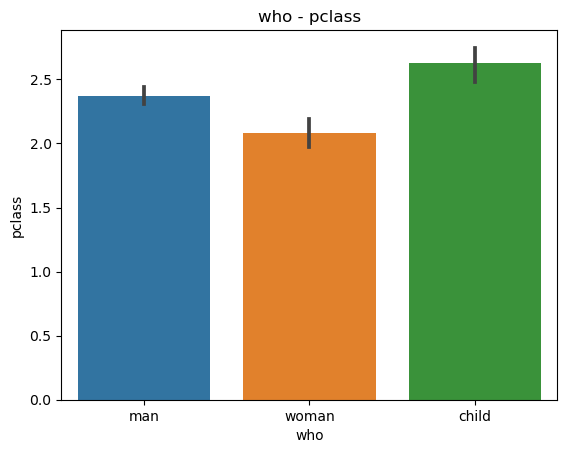

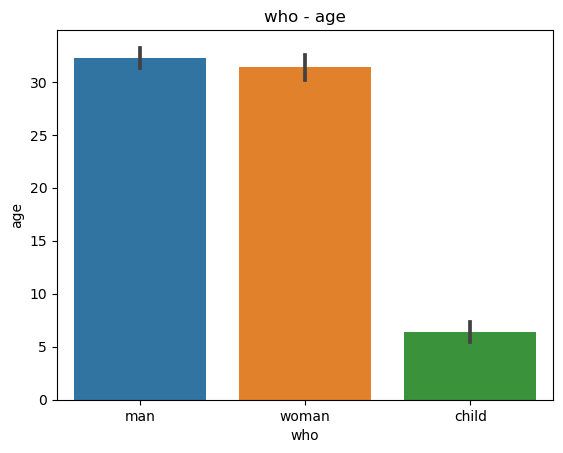

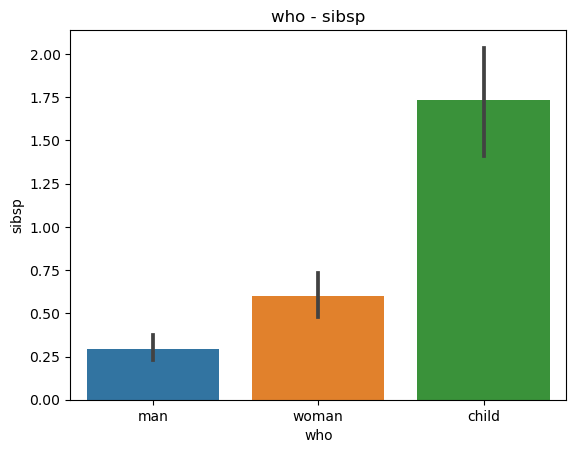

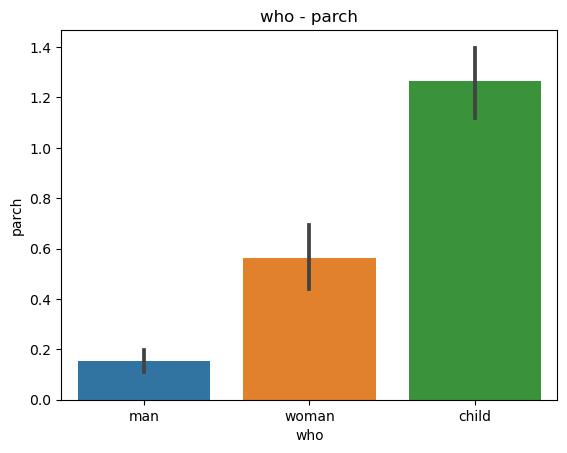

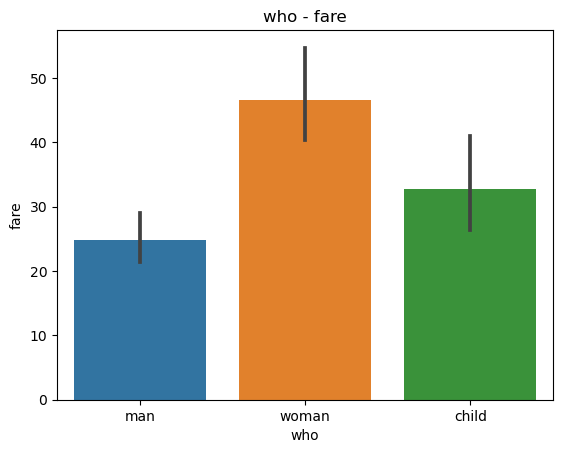

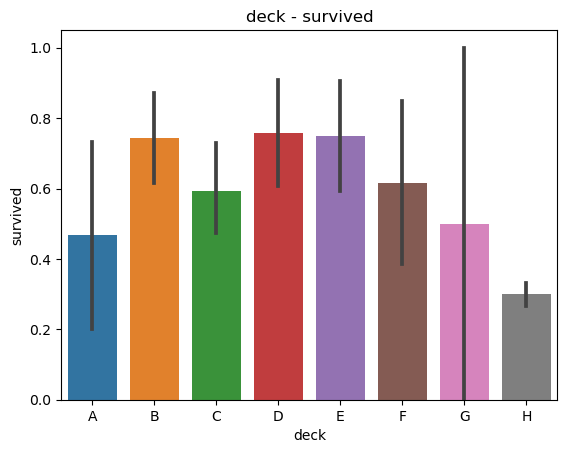

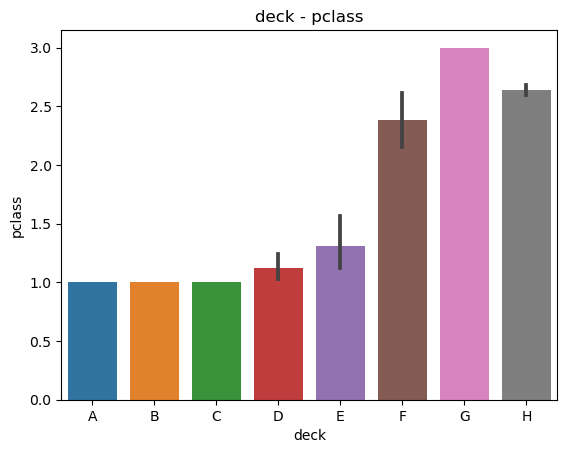

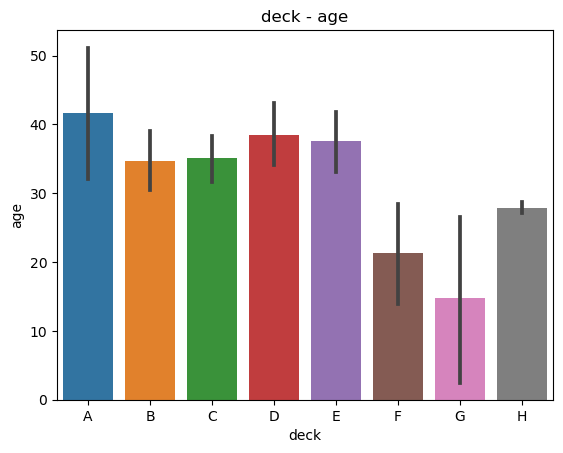

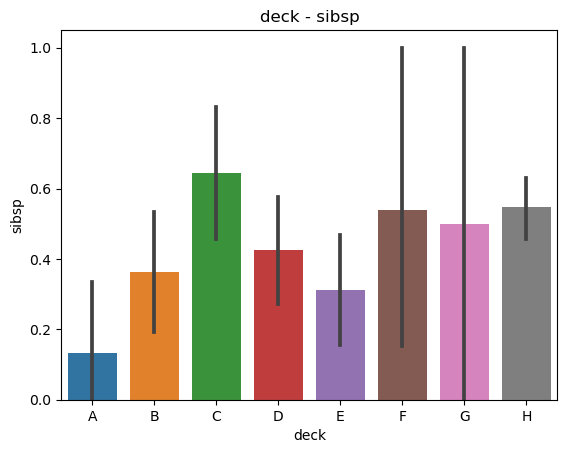

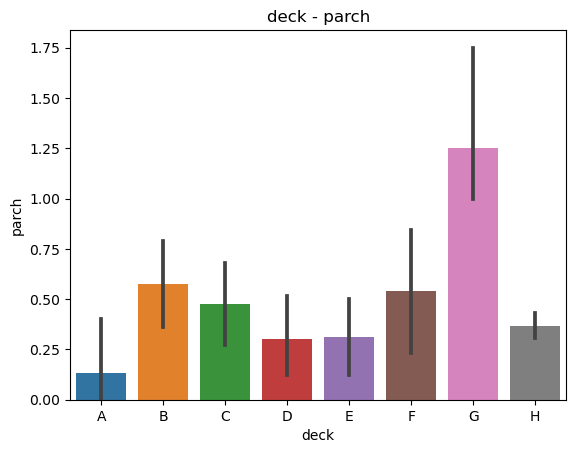

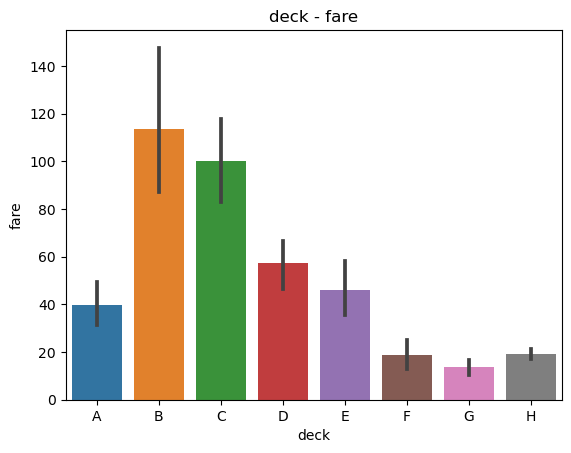

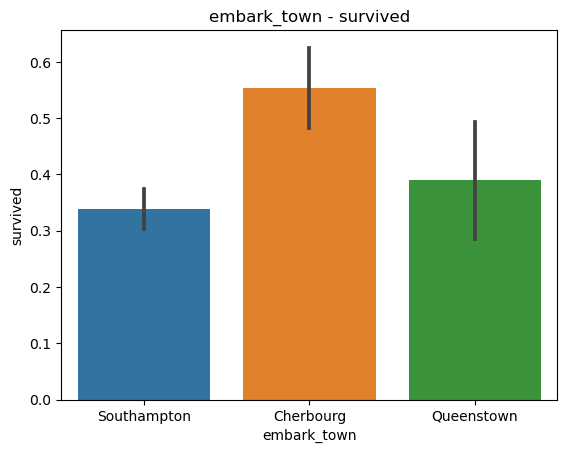

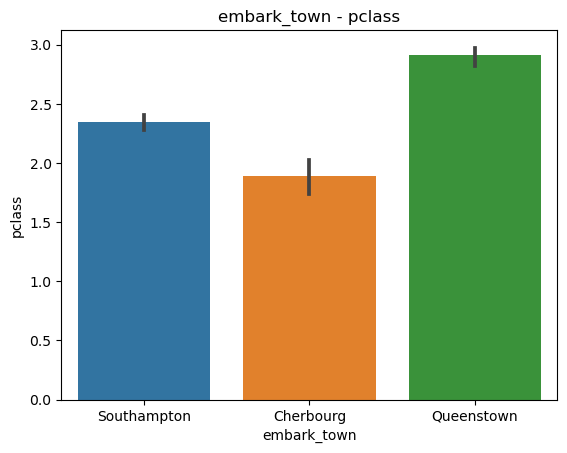

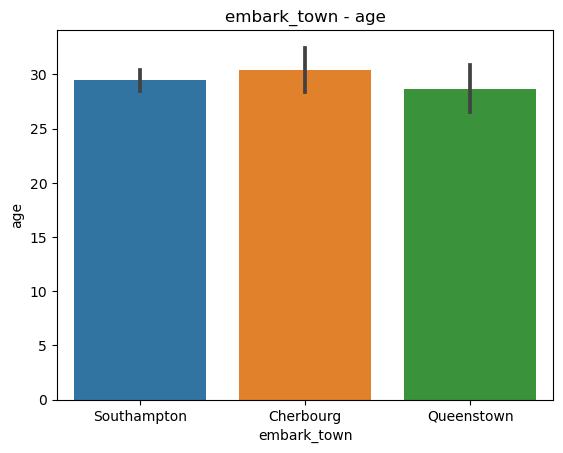

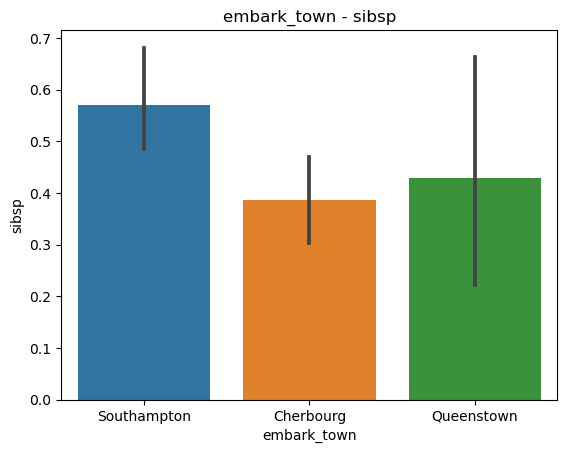

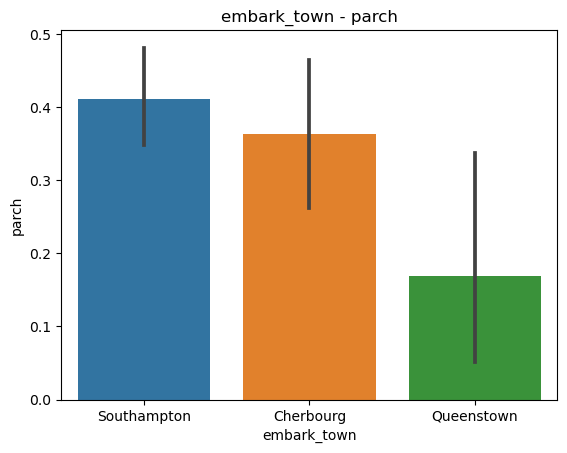

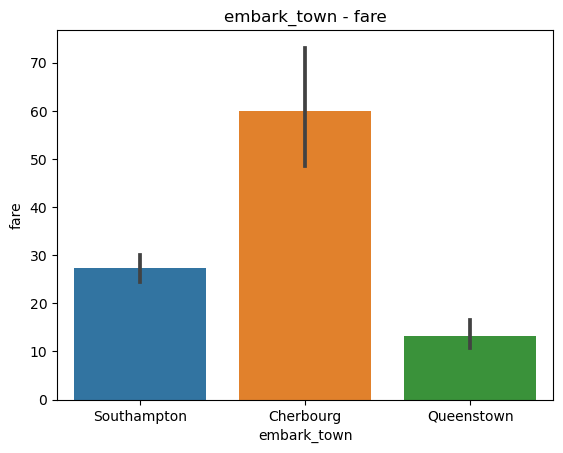

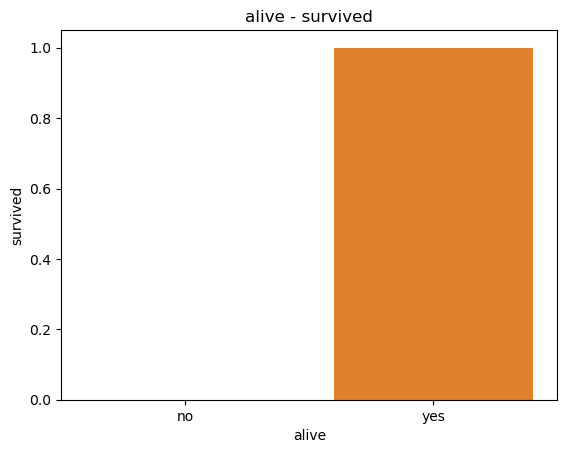

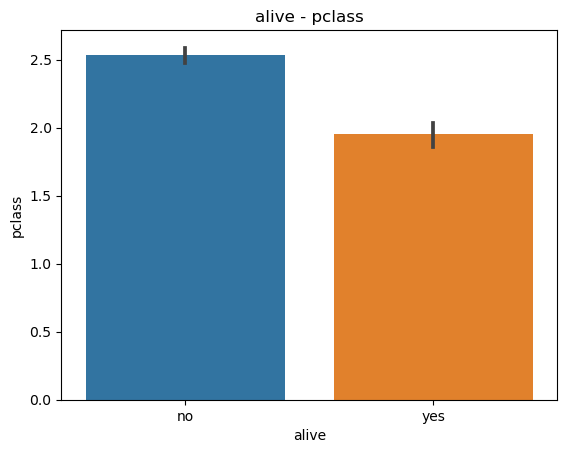

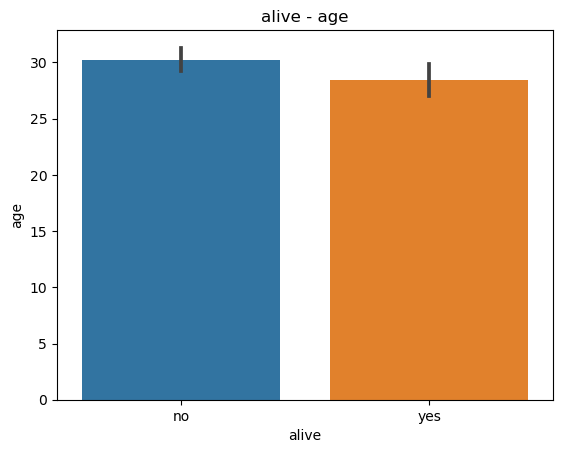

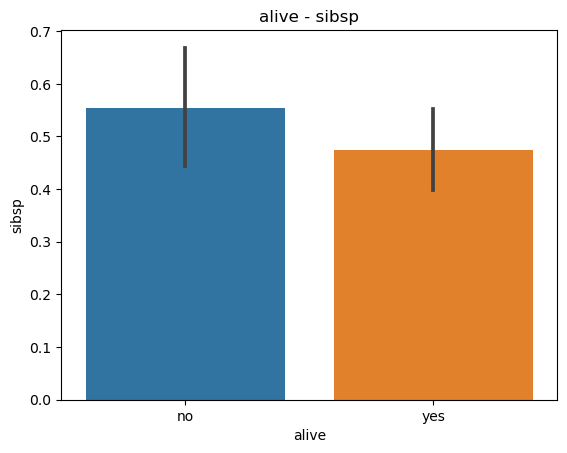

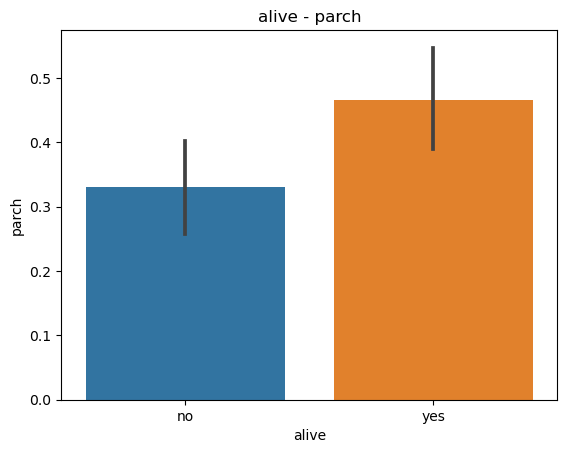

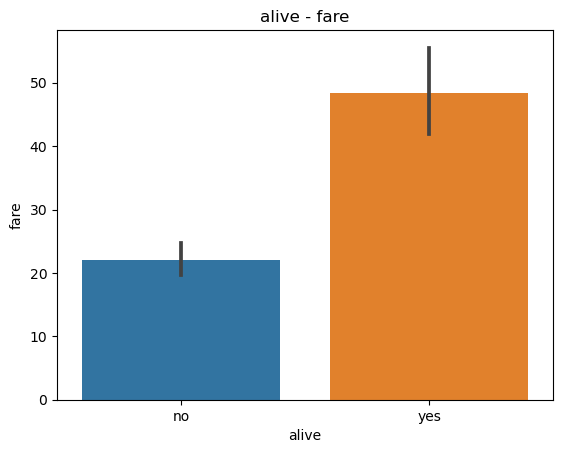

In [52]:
for i in cat_list:
    for j in num_list:
        #plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        #plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.barplot(x = i, y = j, data = df)
        plt.show()

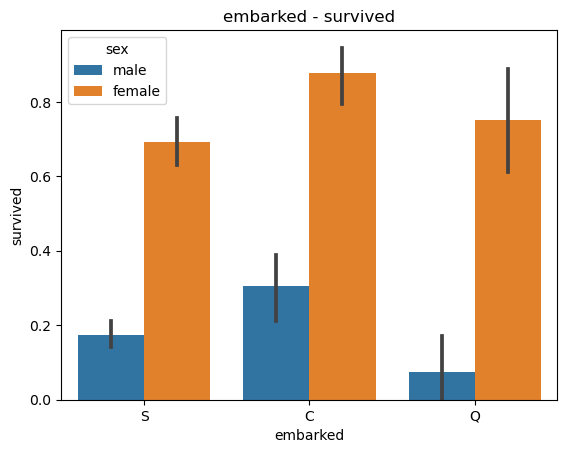

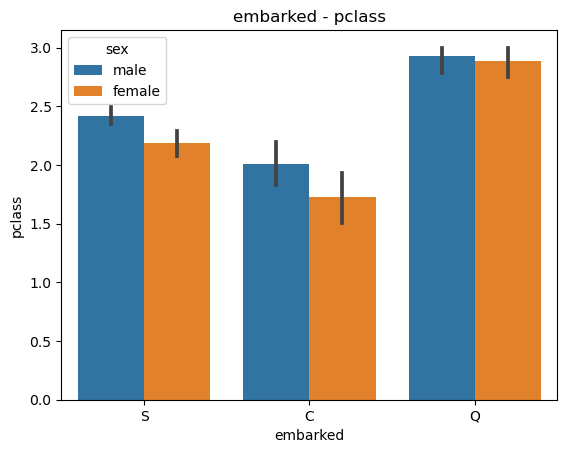

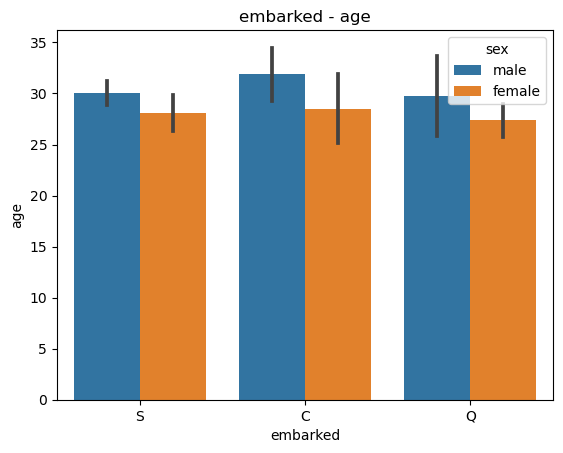

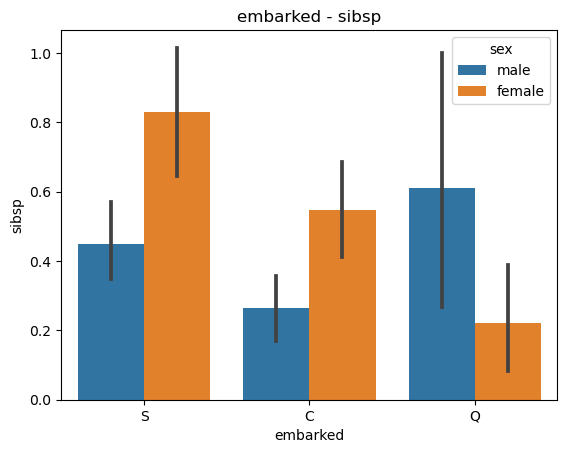

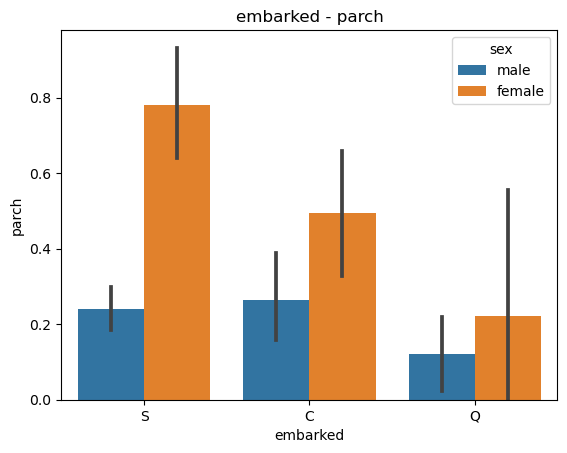

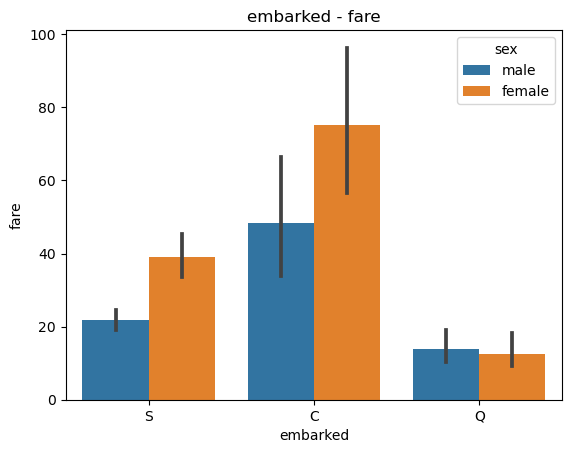

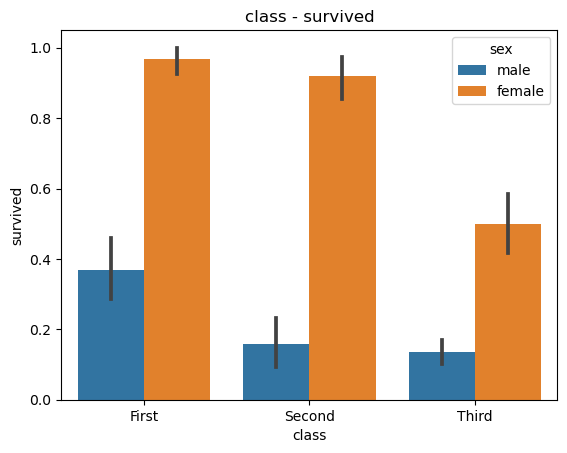

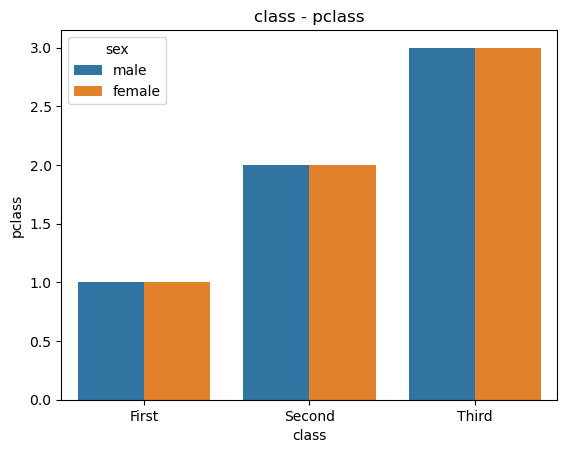

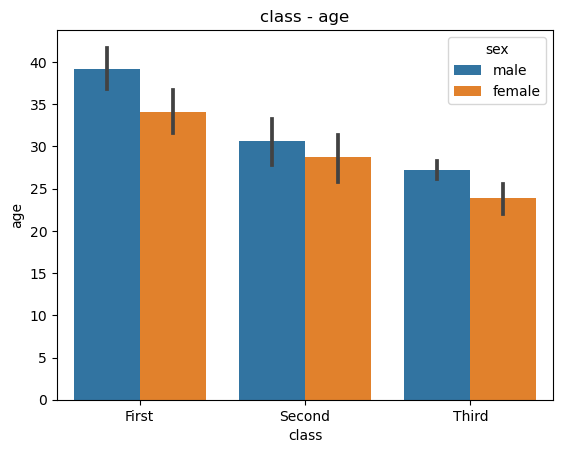

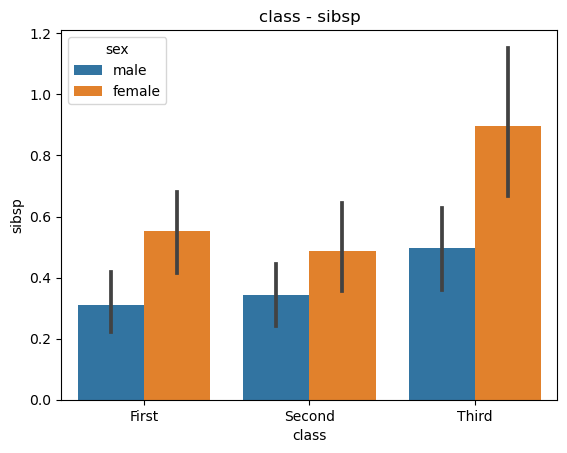

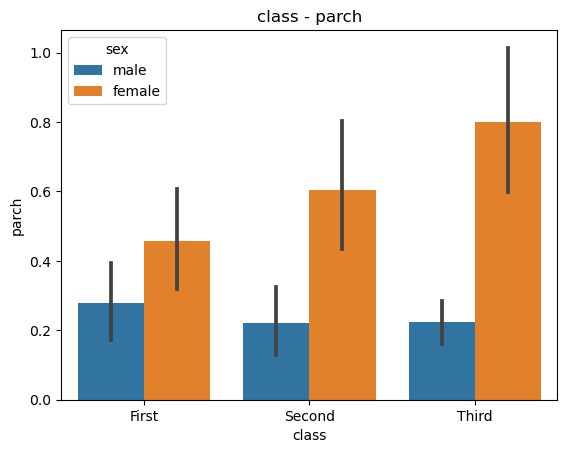

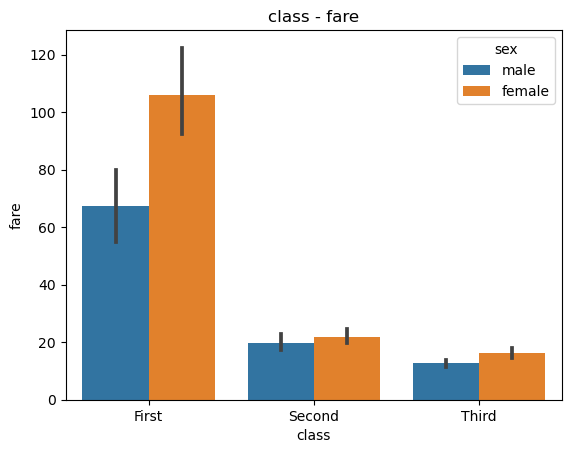

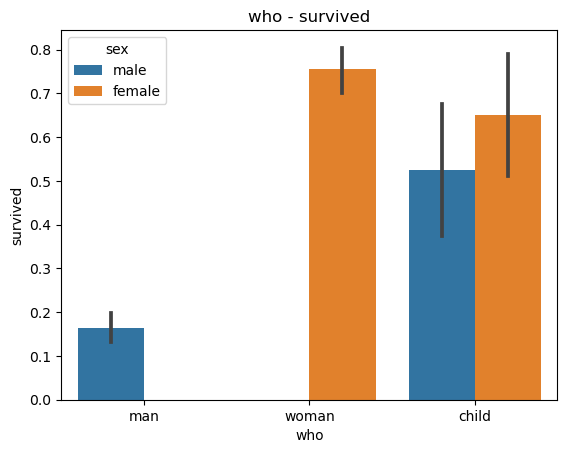

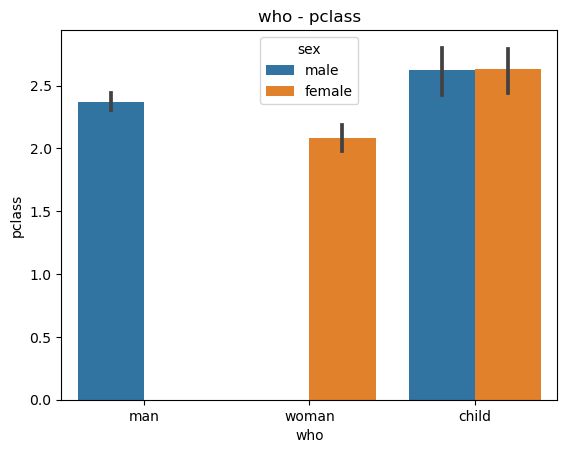

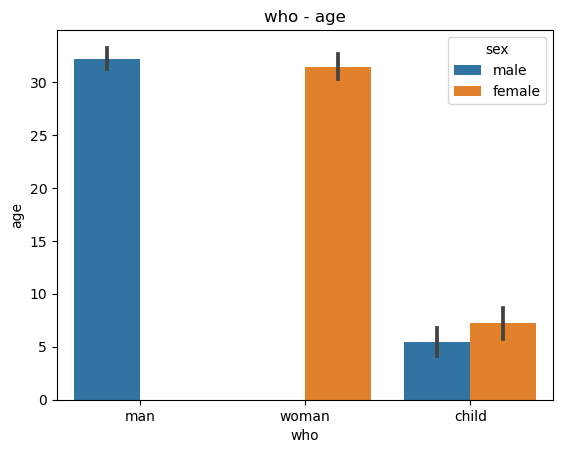

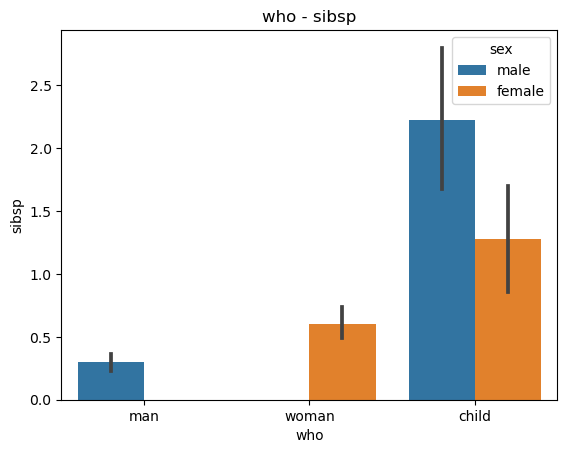

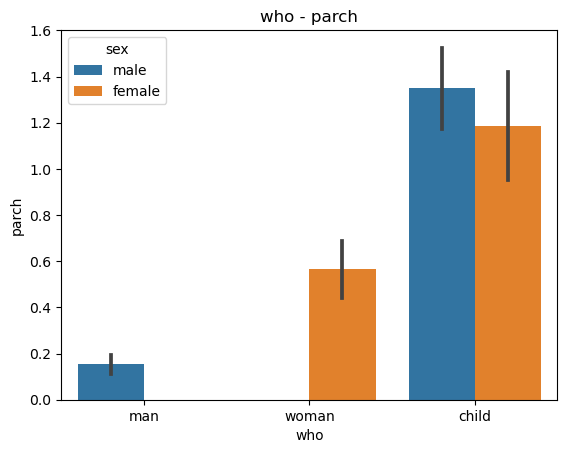

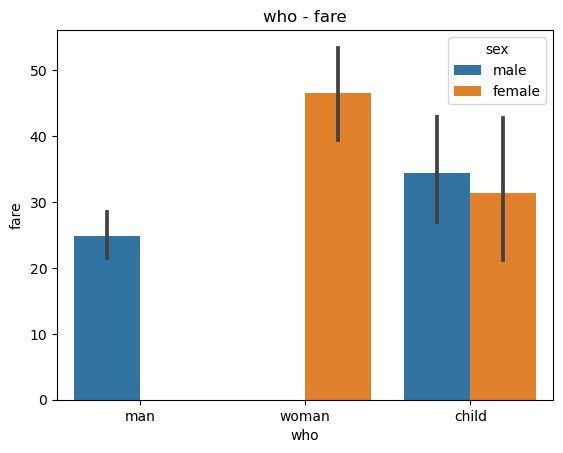

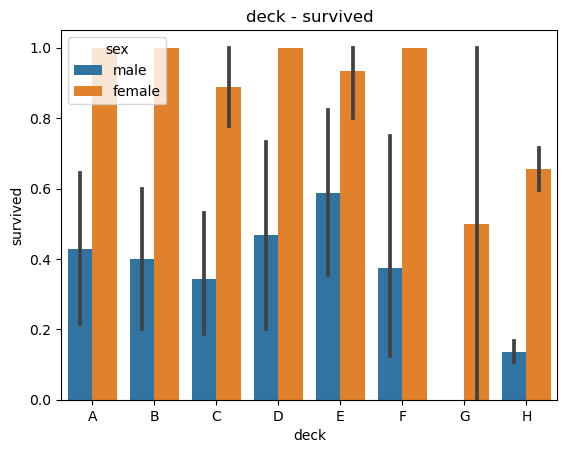

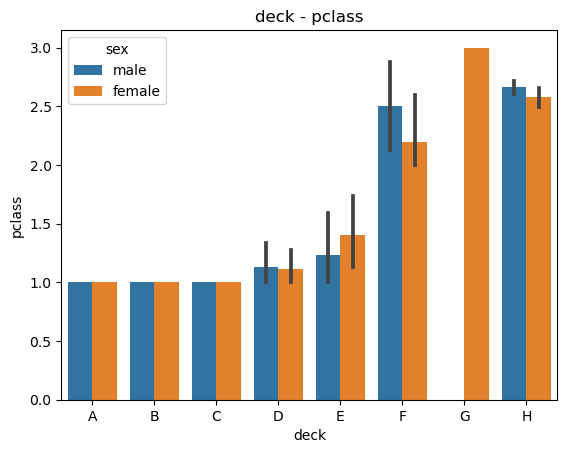

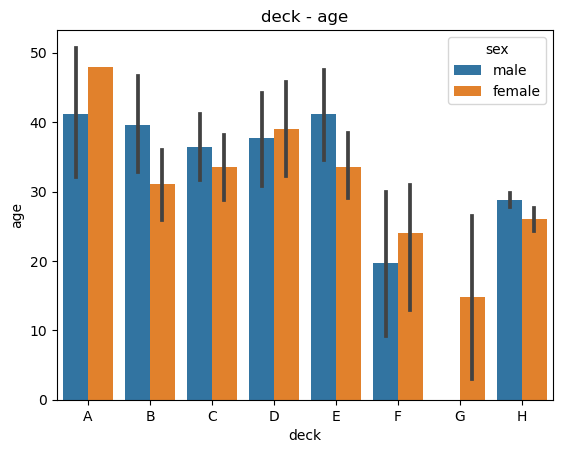

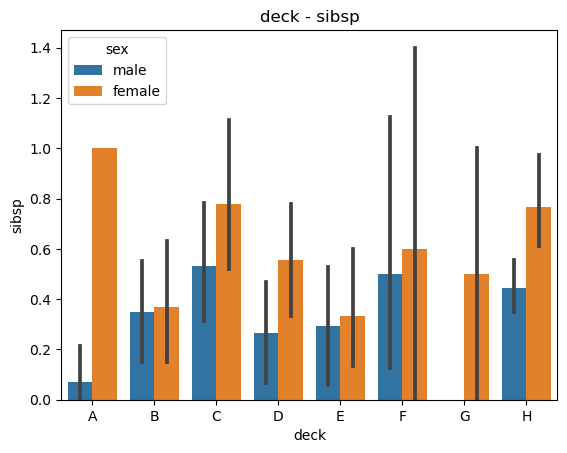

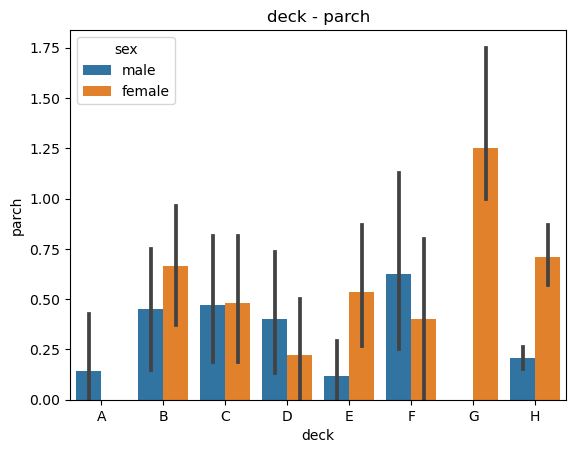

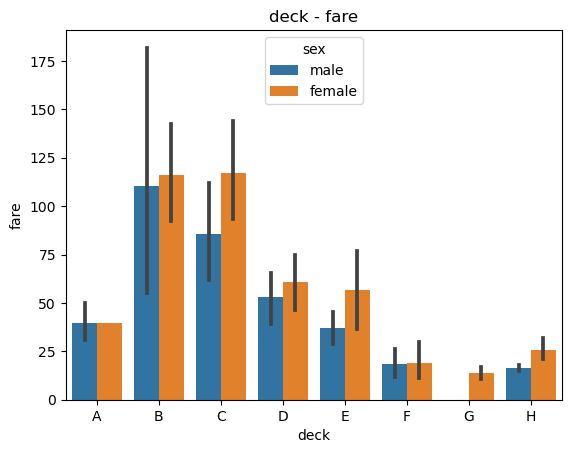

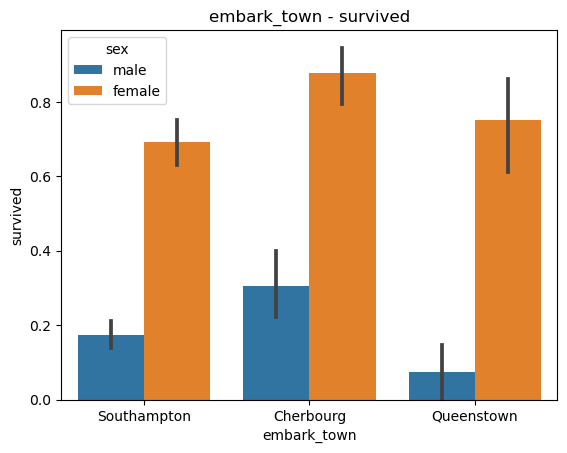

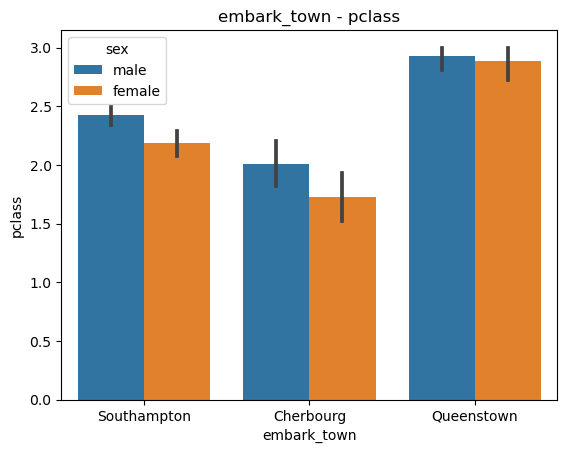

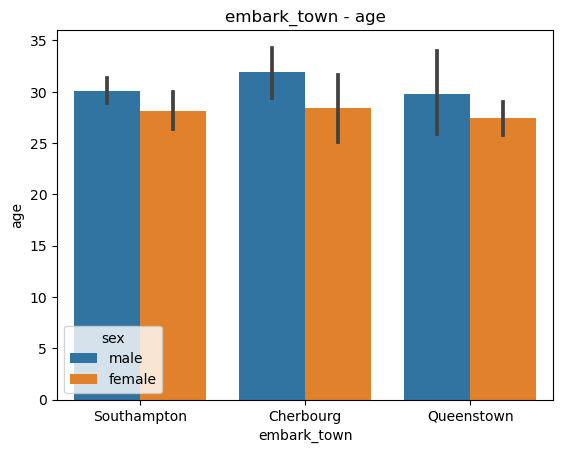

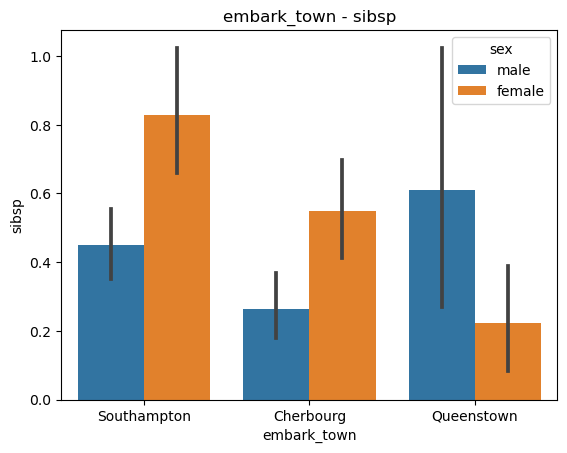

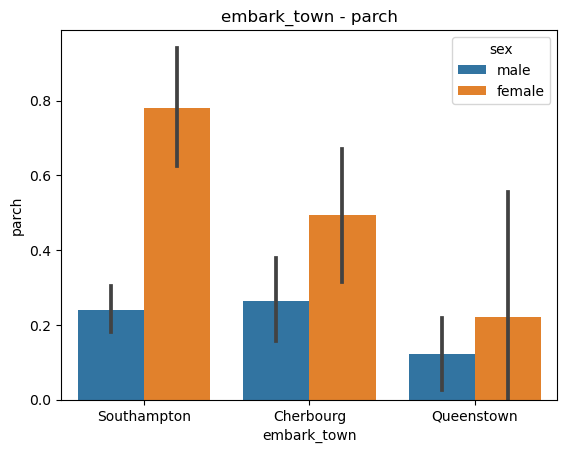

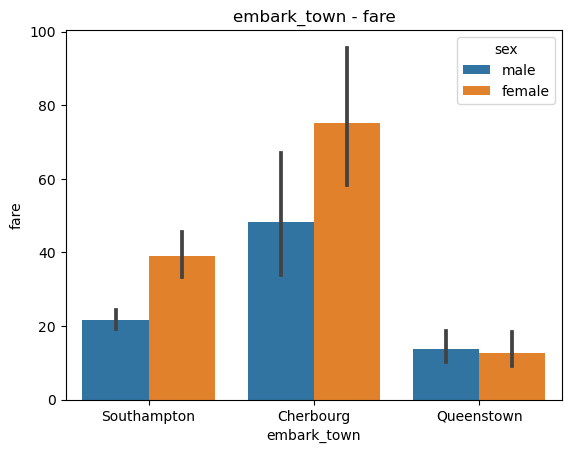

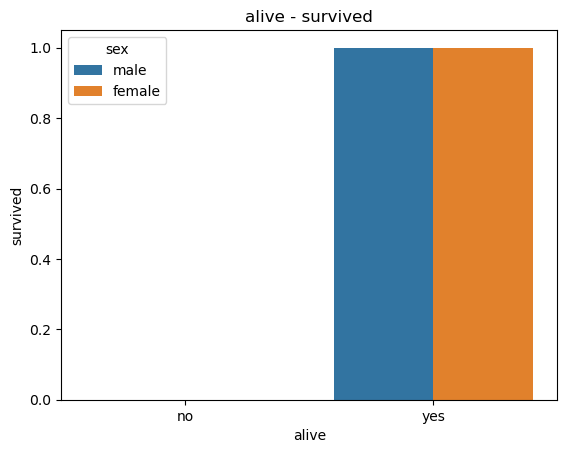

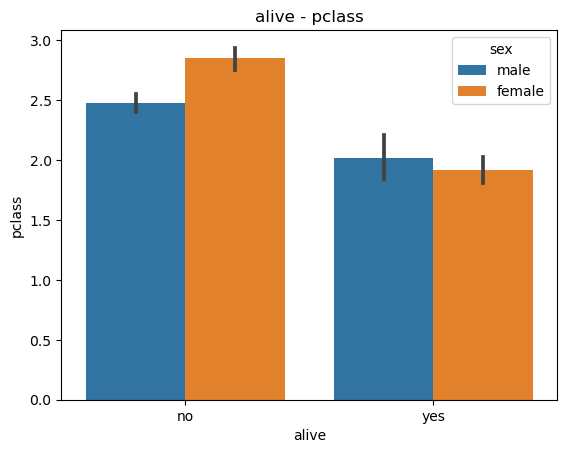

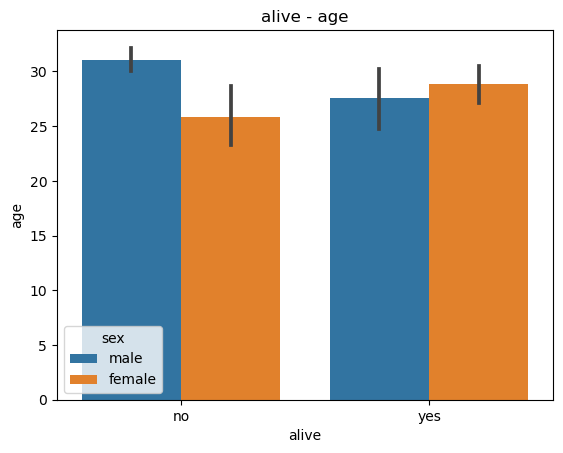

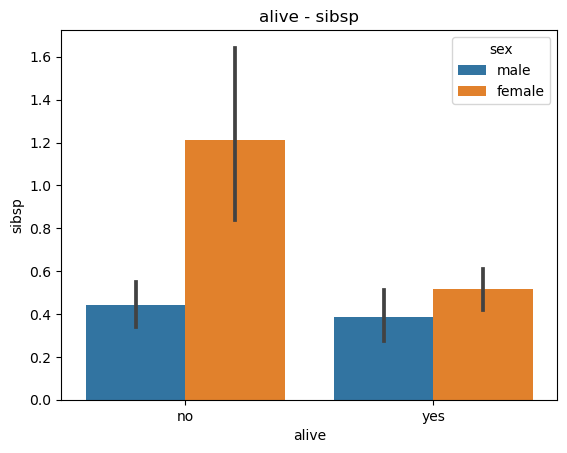

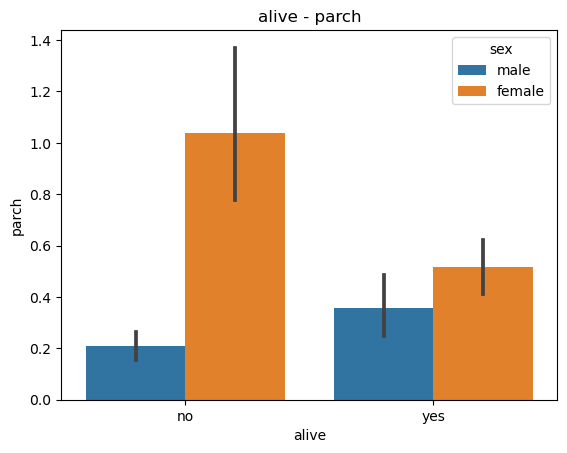

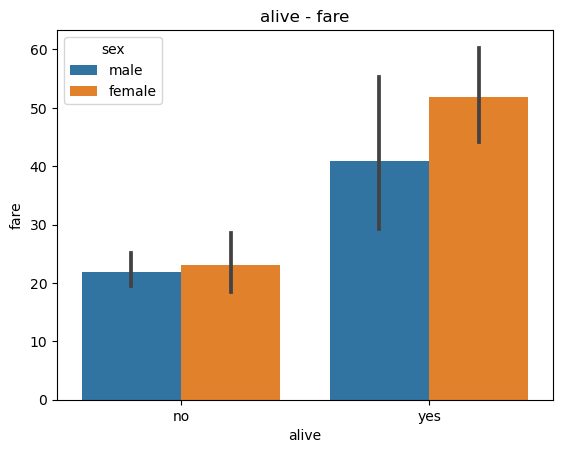

In [53]:
cat_list.remove("sex")
for i in cat_list:
    for j in num_list:
        plt.title(f"{i} - {j}")
        sns.barplot(x = i, y = j, hue = "sex", data = df)
        plt.show()